#### TP1 -- #Grupo 17
# Analisis de Datos

## Analisis Cuantitativo 
    En esta seccion para analizar la diferencia del error absoluto entre Colley y los test de la catedra vamos a utilizar pandas para crear un dataframe y visualizar esta distribucion en un boxplot con seaborn. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import filecmp
from IPython.display import display, HTML

# Analisis Cuantitativo

In [2]:
df_tests_mean = pd.DataFrame(columns=['Test', 'Mean'])

# funcion para calcular la dif absoluta y graficar 
def dif_de_error(dir,color):
    df = pd.read_csv(f"{dir}.expected", sep=" ", names=["Catedra"])
    df_2 = pd.read_csv(f"{dir}.out", sep=" ", header=None, names=["Colley"])
    df['Colley'] = df_2["Colley"]
    df['Diferencia absoluta'] = abs(df['Catedra']-df['Colley'])
    name = dir.split('/')[-1]
    #A partir de aca graficamos
    my_colors = [color]
    sns.set_palette(sns.color_palette(my_colors))
    sns.set_style("whitegrid")
    ax = sns.boxplot(y=df["Diferencia absoluta"])
    ax.set_title(name)
    fig = ax.get_figure()
    fig.savefig(f"graficos/{name}.png")
    plt.show()
    global df_tests_mean
    df_tests_mean = df_tests_mean.append({'Test': name, 'Mean': str(df['Diferencia absoluta'].median())}, ignore_index=True)
    print('La diferencia de caso: '+ name +' tiene un promedio de ' + str(df['Diferencia absoluta'].mean()) + ', una mediana de ' + str(df['Diferencia absoluta'].median()) +  ' y una desviacion de ' + str(df['Diferencia absoluta'].std()))

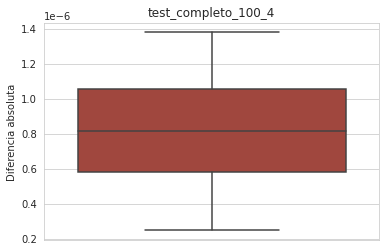

La diferencia de caso: test_completo_100_4 tiene un promedio de 8.263856107071366e-07, una mediana de 8.14856525033214e-07 y una desviacion de 3.0171526360237124e-07


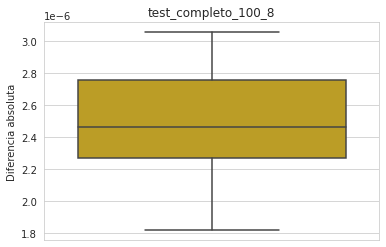

La diferencia de caso: test_completo_100_8 tiene un promedio de 2.497623989591857e-06, una mediana de 2.462933029939718e-06 y una desviacion de 3.1429794676589965e-07


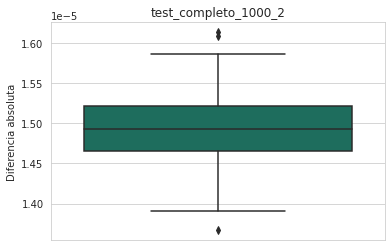

La diferencia de caso: test_completo_1000_2 tiene un promedio de 1.4932965938340648e-05, una mediana de 1.4922529980004873e-05 y una desviacion de 3.745875126227256e-07


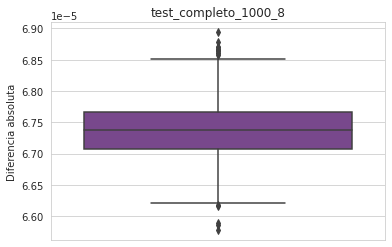

La diferencia de caso: test_completo_1000_8 tiene un promedio de 6.738384033064066e-05, una mediana de 6.737821289498624e-05 y una desviacion de 4.533636226283224e-07


In [3]:
# Graficamos los boxplots 
tests = [("test_completos/test_completo_100_4", "#B03A2E" ),
         ("test_completos/test_completo_100_8", "#D4AC0D"),
         ("test_completos/test_completo_1000_2", "#117A65"),
         ("test_completos/test_completo_1000_8", "#7D3C98")]
for test in tests:
    dif_de_error(test[0],test[1])

In [4]:
print(df_tests_mean)

                   Test                    Mean
0   test_completo_100_4    8.14856525033214e-07
1   test_completo_100_8   2.462933029939718e-06
2  test_completo_1000_2  1.4922529980004873e-05
3  test_completo_1000_8   6.737821289498624e-05


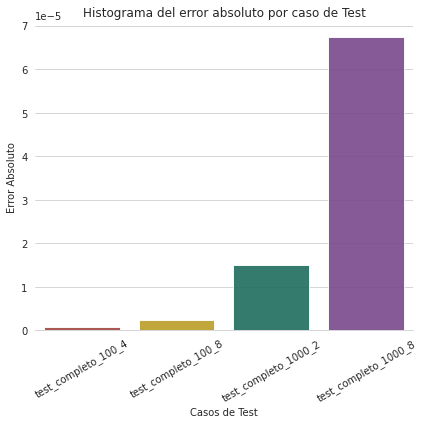

In [5]:
colors =["#B03A2E","#D4AC0D","#117A65","#7D3C98"]
miPaleta = sns.set_palette(sns.color_palette(colors))



chart = sns.catplot(
    data=df_tests_mean, kind="bar",
    x="Test", y="Mean", ci="sd", palette=miPaleta, alpha=.9, height=6
)
chart.despine(left=True)
chart.set_axis_labels("Casos de Test", "Error Absoluto")
plt.title("Histograma del error absoluto por caso de Test")
plt.xticks(rotation=30)
plt.tight_layout()
chart.savefig("histograma_medias.png")

# Analisis Cualitativo

### Generar cuadros comparativos entre metodos
    En esta seccion vamos a unir los resultados de los experimentos para visualizar como el metodo afecta un ranking

## NBA

In [6]:
df_CMM = open('nba/nba_2016_scores_0.out', 'r').readlines()
df_WP = open('nba/nba_2016_scores_1.out', 'r').readlines()
df_SR = open('nba/nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA.insert(1, 'CMM', columnCMM)
df_NBA.insert(2, 'WP', columnWP)
df_NBA.insert(3, 'SR', columnSR)
display(df_NBA)

,team,CMM,WP,SR
1,Atlanta,0.558822,0.567164,0.017105
2,Boston,0.565690,0.582090,0.019453
3,Brooklyn,0.290736,0.283582,-0.030870
4,Charlotte,0.558224,0.560606,0.010764
5,Chicago,0.516007,0.507692,-0.006392
6,Cleveland,0.692428,0.712121,0.030824
7,Dallas,0.502178,0.507463,-0.001527
8,Denver,0.420858,0.411765,-0.010365
9,Detroit,0.500250,0.507463,0.002353
10,Golden_State,0.874063,0.909091,0.049952


### Orden por Colley

In [7]:
df_NBA.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
10,Golden_State,0.874063,0.909091,0.049952
27,San_Antonio,0.803976,0.850746,0.062855
6,Cleveland,0.692428,0.712121,0.030824
28,Toronto,0.659347,0.681818,0.022720
21,Oklahoma_City,0.655552,0.671642,0.032421
13,LA_Clippers,0.629708,0.636364,0.017956
16,Miami,0.577367,0.582090,0.005845
2,Boston,0.565690,0.582090,0.019453
15,Memphis,0.563176,0.582090,-0.007188
1,Atlanta,0.558822,0.567164,0.017105


### Orden por WP

In [8]:
df_NBA.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
10,Golden_State,0.874063,0.909091,0.049952
27,San_Antonio,0.803976,0.850746,0.062855
6,Cleveland,0.692428,0.712121,0.030824
28,Toronto,0.659347,0.681818,0.022720
21,Oklahoma_City,0.655552,0.671642,0.032421
13,LA_Clippers,0.629708,0.636364,0.017956
16,Miami,0.577367,0.582090,0.005845
2,Boston,0.565690,0.582090,0.019453
15,Memphis,0.563176,0.582090,-0.007188
1,Atlanta,0.558822,0.567164,0.017105


### Orden por SR

In [9]:
df_NBA.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NBA)

,team,CMM,WP,SR
27,San_Antonio,0.803976,0.850746,0.062855
10,Golden_State,0.874063,0.909091,0.049952
21,Oklahoma_City,0.655552,0.671642,0.032421
6,Cleveland,0.692428,0.712121,0.030824
28,Toronto,0.659347,0.681818,0.022720
2,Boston,0.565690,0.582090,0.019453
13,LA_Clippers,0.629708,0.636364,0.017956
1,Atlanta,0.558822,0.567164,0.017105
4,Charlotte,0.558224,0.560606,0.010764
12,Indiana,0.547962,0.537313,0.007079


In [10]:
 df_NBA.sort_values(by=['WP'], ascending=False)['team']


10      Golden_State
27       San_Antonio
6          Cleveland
28           Toronto
21     Oklahoma_City
13       LA_Clippers
2             Boston
16             Miami
15           Memphis
1            Atlanta
4          Charlotte
12           Indiana
25          Portland
5            Chicago
11           Houston
7             Dallas
9            Detroit
29              Utah
30        Washington
22           Orlando
17         Milwaukee
8             Denver
20          New_York
26        Sacramento
19       New_Orleans
18         Minnesota
3           Brooklyn
24           Phoenix
14         LA_Lakers
23      Philadelphia
Name: team, dtype: object

In [11]:
df_NBA_rankings = df_NBA.drop(['team'],axis=1)
df_NBA_rankings["CMM"] = df_NBA.sort_values(by=['CMM'], ascending=False)['team'].values
df_NBA_rankings["WP"] = df_NBA.sort_values(by=['WP'], ascending=False)['team'].values
df_NBA_rankings["SR"] = df_NBA.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NBA_rankings)

,CMM,WP,SR
27,Golden_State,Golden_State,San_Antonio
10,San_Antonio,San_Antonio,Golden_State
21,Cleveland,Cleveland,Oklahoma_City
6,Toronto,Toronto,Cleveland
28,Oklahoma_City,Oklahoma_City,Toronto
2,LA_Clippers,LA_Clippers,Boston
13,Miami,Boston,LA_Clippers
1,Boston,Miami,Atlanta
4,Memphis,Memphis,Charlotte
12,Atlanta,Atlanta,Indiana


## NFL

In [12]:
df_CMM = open('nfl/nfl_2019_0.out', 'r').readlines()
df_WP = open('nfl/nfl_2019_1.out', 'r').readlines()
df_SR = open('nfl/nfl_2019_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NFL = pd.read_csv('../data/nfl_teams.csv', names=['team'])

df_NFL.insert(1, 'CMM', columnCMM)
df_NFL.insert(2, 'WP', columnWP)
df_NFL.insert(3, 'SR', columnSR)
display(df_NFL)

,team,CMM,WP,SR
1,Arizona,0.371310,0.312500,-0.100872
2,Atlanta,0.493248,0.437500,-0.023077
3,Baltimore,0.794117,0.823529,0.273154
4,Buffalo,0.532957,0.588235,0.084691
5,Carolina,0.385667,0.312500,-0.160494
6,Chicago,0.502528,0.500000,-0.031142
7,Cincinnati,0.198437,0.125000,-0.201717
8,Cleveland,0.409957,0.375000,-0.079670
9,Dallas,0.452425,0.500000,0.149669
10,Denver,0.467487,0.437500,-0.056856


### ORDEN POR COLLEY

In [13]:
df_NFL.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NFL)

,team,CMM,WP,SR
28,San_Francisco,0.805164,0.789474,0.205567
16,Kansas_City,0.800313,0.789474,0.194532
3,Baltimore,0.794117,0.823529,0.273154
23,New_Orleans,0.754284,0.764706,0.131361
12,Green_Bay,0.745049,0.777778,0.063990
29,Seattle,0.692670,0.666667,0.011364
13,Houston,0.644497,0.611111,-0.027088
22,New_England,0.644044,0.705882,0.277286
31,Tennessee,0.612560,0.578947,0.095954
21,Minnesota,0.611262,0.611111,0.117276


### ORDEN POR WP

In [14]:
df_NFL.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NFL)

,team,CMM,WP,SR
3,Baltimore,0.794117,0.823529,0.273154
28,San_Francisco,0.805164,0.789474,0.205567
16,Kansas_City,0.800313,0.789474,0.194532
12,Green_Bay,0.745049,0.777778,0.063990
23,New_Orleans,0.754284,0.764706,0.131361
22,New_England,0.644044,0.705882,0.277286
29,Seattle,0.692670,0.666667,0.011364
21,Minnesota,0.611262,0.611111,0.117276
13,Houston,0.644497,0.611111,-0.027088
4,Buffalo,0.532957,0.588235,0.084691


### Orden por SR

In [15]:
df_NFL.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NFL)

,team,CMM,WP,SR
22,New_England,0.644044,0.705882,0.277286
3,Baltimore,0.794117,0.823529,0.273154
28,San_Francisco,0.805164,0.789474,0.205567
16,Kansas_City,0.800313,0.789474,0.194532
9,Dallas,0.452425,0.500000,0.149669
23,New_Orleans,0.754284,0.764706,0.131361
21,Minnesota,0.611262,0.611111,0.117276
31,Tennessee,0.612560,0.578947,0.095954
4,Buffalo,0.532957,0.588235,0.084691
12,Green_Bay,0.745049,0.777778,0.063990


### Ranking Results

In [16]:
df_NFL_rankings = df_NFL.drop(['team'],axis=1)
df_NFL_rankings["CMM"] = df_NFL.sort_values(by=['CMM'], ascending=False)['team'].values
df_NFL_rankings["WP"] = df_NFL.sort_values(by=['WP'], ascending=False)['team'].values
df_NFL_rankings["SR"] = df_NFL.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NFL_rankings)

,CMM,WP,SR
22,San_Francisco,Baltimore,New_England
3,Kansas_City,San_Francisco,Baltimore
28,Baltimore,Kansas_City,San_Francisco
16,New_Orleans,Green_Bay,Kansas_City
9,Green_Bay,New_Orleans,Dallas
23,Seattle,New_England,New_Orleans
21,Houston,Seattle,Minnesota
31,New_England,Minnesota,Tennessee
4,Tennessee,Houston,Buffalo
12,Minnesota,Buffalo,Green_Bay


## NHL

In [17]:
df_CMM = open('nhl/nhl_2019_0.out', 'r').readlines()
df_WP = open('nhl/nhl_2019_1.out', 'r').readlines()
df_SR = open('nhl/nhl_2019_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NHL = pd.read_csv('../data/nhl_teams.csv', names=['team'])

df_NHL.insert(1, 'CMM', columnCMM)
df_NHL.insert(2, 'WP', columnWP)
df_NHL.insert(3, 'SR', columnSR)
display(df_NHL)

,team,CMM,WP,SR
1,Anaheim,0.427694,0.426829,-0.115556
2,Arizona,0.472638,0.475610,-0.022936
3,Boston,0.615122,0.603774,0.119205
4,Buffalo,0.410841,0.402439,-0.090543
5,Calgary,0.575575,0.586207,0.102941
6,Carolina,0.567826,0.556701,0.034608
7,Chicago,0.443862,0.439024,-0.039146
8,Colorado,0.487039,0.478723,0.031469
9,Columbus,0.589017,0.576087,0.056881
10,Dallas,0.533460,0.526316,0.027254


### Orden por Colley

In [18]:
df_NHL.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NHL)

,team,CMM,WP,SR
26,Tampa_Bay,0.712066,0.720930,0.160279
3,Boston,0.615122,0.603774,0.119205
9,Columbus,0.589017,0.576087,0.056881
19,NY_Islanders,0.578345,0.577778,0.069264
25,St_Louis,0.575989,0.564815,0.047155
5,Calgary,0.575575,0.586207,0.102941
30,Washington,0.575363,0.573034,0.049296
6,Carolina,0.567826,0.556701,0.034608
27,Toronto,0.557473,0.550562,0.050260
31,Winnipeg,0.557397,0.556818,0.051095


### Orden por WP

In [19]:
df_NHL.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NHL)

,team,CMM,WP,SR
26,Tampa_Bay,0.712066,0.720930,0.160279
3,Boston,0.615122,0.603774,0.119205
5,Calgary,0.575575,0.586207,0.102941
19,NY_Islanders,0.578345,0.577778,0.069264
9,Columbus,0.589017,0.576087,0.056881
30,Washington,0.575363,0.573034,0.049296
25,St_Louis,0.575989,0.564815,0.047155
31,Winnipeg,0.557397,0.556818,0.051095
17,Nashville,0.556458,0.556818,0.041322
6,Carolina,0.567826,0.556701,0.034608


### Orden por SR

In [20]:
df_NHL.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NHL)

,team,CMM,WP,SR
26,Tampa_Bay,0.712066,0.720930,0.160279
3,Boston,0.615122,0.603774,0.119205
5,Calgary,0.575575,0.586207,0.102941
19,NY_Islanders,0.578345,0.577778,0.069264
9,Columbus,0.589017,0.576087,0.056881
31,Winnipeg,0.557397,0.556818,0.051095
27,Toronto,0.557473,0.550562,0.050260
30,Washington,0.575363,0.573034,0.049296
25,St_Louis,0.575989,0.564815,0.047155
23,Pittsburgh,0.516283,0.511628,0.044944


### Ranking Results

In [21]:
df_NHL_rankings = df_NHL.drop(['team'],axis=1)
df_NHL_rankings["CMM"] = df_NHL.sort_values(by=['CMM'], ascending=False)['team'].values
df_NHL_rankings["WP"] = df_NHL.sort_values(by=['WP'], ascending=False)['team'].values
df_NHL_rankings["SR"] = df_NHL.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NHL_rankings)

,CMM,WP,SR
26,Tampa_Bay,Tampa_Bay,Tampa_Bay
3,Boston,Boston,Boston
5,Columbus,Calgary,Calgary
19,NY_Islanders,NY_Islanders,NY_Islanders
9,St_Louis,Columbus,Columbus
31,Calgary,Washington,Winnipeg
27,Washington,St_Louis,Toronto
30,Carolina,Winnipeg,Washington
25,Toronto,Nashville,St_Louis
23,Winnipeg,Carolina,Pittsburgh


## ATP

In [22]:
def atp_players_ids(file):
    df_ATP = open(file)
    set_players = set()
    first_row = True
    for row in df_ATP:
        if (first_row):
            first_row = False
            continue
        set_players.add(int(row[9:15]))
        set_players.add(int(row[18:24]))
    return set_players



In [23]:
def fetch_atp_players_names_by_id(list_players):
    df_players = pd.read_csv("../data/atp_players.csv",
                            names=['player_id','first_name','last_name','hand','birth_date','country_code'],header=None)
    list_players_name_sorted = []
    for id_p in list_players:
        player_row = df_players.loc[df_players['player_id'] == id_p]
        player_name = player_row.iloc[0]['last_name'] + " " + player_row.iloc[0]['first_name']
        list_players_name_sorted.append(player_name)
    return list_players_name_sorted

In [24]:
#Busco id de jugadores del dataset
set_players = atp_players_ids("../data/atp_matches_2015.dat")
#Los ordeno
list_players = sorted(set_players)
#Busco los IDs en el archivo de players
list_players_name_sorted = fetch_atp_players_names_by_id(list_players)

df_CMM = open("atp/atp_matches_2015_0.out", 'r').readlines()
df_WP  = open("atp/atp_matches_2015_1.out", 'r').readlines()
df_SR  = open("atp/atp_matches_2015_2.out", 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_ATP = pd.DataFrame()

df_ATP.insert(0, 'player', list_players_name_sorted)
df_ATP.insert(1, 'CMM', columnCMM)
df_ATP.insert(2, 'WP', columnWP)
df_ATP.insert(3, 'SR', columnSR)
display(df_ATP)


,player,CMM,WP,SR
0,Zverev Alexander,0.626871,0.451613,-0.096774
1,Haas Tommy,0.425718,0.181818,-0.636364
2,Russell Michael,0.442967,0.000000,-1.000000
3,Stepanek Radek,0.586419,0.411765,-0.176471
4,Karlovic Ivo,0.804331,0.603175,0.206349
...,...,...,...,...
425,Matvievici Egor,0.376443,0.000000,-1.000000
426,Rakotohasy Jean Jacques,0.607832,1.000000,1.000000
427,Habib Hady,0.470578,0.500000,0.000000
428,Diaz Alex,0.630696,1.000000,1.000000


In [25]:
df_ATP.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_ATP.head(10))
df_ATP.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_ATP.head(10))
df_ATP.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_ATP.head(10))

,player,CMM,WP,SR
134,Djokovic Novak,1.267230,0.932584,0.865169
19,Federer Roger,1.164020,0.851351,0.702703
132,Murray Andy,1.141130,0.825581,0.651163
70,Wawrinka Stanislas,1.036890,0.743243,0.486486
214,Nishikori Kei,1.022890,0.763889,0.527778
106,Nadal Rafael,1.020910,0.753086,0.506173
87,Berdych Tomas,1.013320,0.721519,0.443038
32,Ferrer David,1.005880,0.774648,0.549296
107,Gasquet Richard,0.985301,0.716667,0.433333
251,Raonic Milos,0.927979,0.673469,0.346939


,player,CMM,WP,SR
401,Garay Christian,0.677645,1.0,1.0
11,Ghareeb Mohammad,0.794806,1.0,1.0
7,Qureshi Aisam Ul Haq,0.742604,1.0,1.0
309,Lama Gonzalo,0.724678,1.0,1.0
343,Garin Christian,0.722988,1.0,1.0
262,Saez Juan Carlos,0.716970,1.0,1.0
27,Mertl Jan,0.713876,1.0,1.0
130,Trijati Sunu Wahyu,0.583260,1.0,1.0
10,Marach Oliver,0.657208,1.0,1.0
160,Podlipnik Castillo Hans,0.640532,1.0,1.0


,player,CMM,WP,SR
401,Garay Christian,0.677645,1.0,1.0
189,Echazu Mauricio,0.625000,1.0,1.0
320,Wang Chieh Fu,0.766782,1.0,1.0
84,Huey Treat Conrad,0.601645,1.0,1.0
197,Martinez Luis David,0.575252,1.0,1.0
257,Lim Yong Kyu,0.605828,1.0,1.0
426,Rakotohasy Jean Jacques,0.607832,1.0,1.0
355,Ramiaramanana Lofo,0.620004,1.0,1.0
429,Xiviller Nicolas,0.625000,1.0,1.0
323,Domingues Joao,0.625000,1.0,1.0


In [26]:
df_ATP_rankings = df_ATP.drop(['player'],axis=1)
df_ATP_rankings["CMM"] = df_ATP.sort_values(by=['CMM'], ascending=False)['player'].values
df_ATP_rankings["WP"] =  df_ATP.sort_values(by=['WP'],  ascending=False)['player'].values
df_ATP_rankings["SR"] =  df_ATP.sort_values(by=['SR'],  ascending=False)['player'].values
display(df_ATP_rankings)

,CMM,WP,SR
401,Djokovic Novak,Garay Christian,Garay Christian
189,Federer Roger,Deviatiarov Marat,Deviatiarov Marat
320,Murray Andy,Qureshi Aisam Ul Haq,Qureshi Aisam Ul Haq
84,Wawrinka Stanislas,Lama Gonzalo,Lama Gonzalo
197,Nishikori Kei,Garin Christian,Garin Christian
...,...,...,...
358,Barry Sam,Puetz Tim,Puetz Tim
147,Bulat Maxim,Sundar Prashanth N Vijay,Sundar Prashanth N Vijay
388,Gonzalez Maximo,Khachanov Karen,Khachanov Karen
373,Cecchinato Marco,Orantes Rafa,Orantes Rafa


In [27]:
display(df_ATP_rankings.head(10))

,CMM,WP,SR
401,Djokovic Novak,Garay Christian,Garay Christian
189,Federer Roger,Deviatiarov Marat,Deviatiarov Marat
320,Murray Andy,Qureshi Aisam Ul Haq,Qureshi Aisam Ul Haq
84,Wawrinka Stanislas,Lama Gonzalo,Lama Gonzalo
197,Nishikori Kei,Garin Christian,Garin Christian
257,Nadal Rafael,Saez Juan Carlos,Saez Juan Carlos
426,Berdych Tomas,Mertl Jan,Mertl Jan
355,Ferrer David,Trijati Sunu Wahyu,Trijati Sunu Wahyu
429,Gasquet Richard,Marach Oliver,Marach Oliver
323,Raonic Milos,Podlipnik Castillo Hans,Podlipnik Castillo Hans


### Busco a los Top 3 de SR y WP en el dataset (El chequeo es manual)
-   1 | Garay Christian
    - ID = 125571
    - Jugo solo 2 partidos, ambos partidos los gano

-   2 | Ghareeb Mohammad
    - ID = 103600
    - Jugo solo 3 partidos, gano todos

-   3 | Qureshi Aisam Ul Haq
    - ID = 103529
    - Jugo solo 2 partidos, ambos partidos los gano

-   4 | Lama Gonzalo
    - ID = 106174
    - Jugo solo 2 partidos, ambos partidos los gano
    
-   5 | Garin Christian
    - ID = 106426
    - Jugo solo 3 partidos, gano todos

#### Experimento extra del analisis cualitativo de ATP

In [28]:
#Busco id de jugadores del dataset
set_players = atp_players_ids("atp/ej_cualitativo/atp_filtered_2015.dat")
#Los ordeno
list_players = sorted(set_players)
#Busco los IDs en el archivo de players
list_players_name_sorted = fetch_atp_players_names_by_id(list_players)

df_CMM = open("atp/ej_cualitativo/atp_filtered_2015_0.out", 'r').readlines()
df_WP  = open("atp/ej_cualitativo/atp_filtered_2015_1.out", 'r').readlines()
df_SR  = open("atp/ej_cualitativo/atp_filtered_2015_2.out", 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_ATP = pd.DataFrame()

df_ATP.insert(0, 'player', list_players_name_sorted)
df_ATP.insert(1, 'CMM', columnCMM)
df_ATP.insert(2, 'WP', columnWP)
df_ATP.insert(3, 'SR', columnSR)
display(df_ATP)

,player,CMM,WP,SR
0,Zverev Alexander,0.422858,0.333333,-0.333333
1,Haas Tommy,0.447275,0.250000,-0.500000
2,Russell Michael,0.427073,0.000000,-1.000000
3,Stepanek Radek,0.428315,0.250000,-0.500000
4,Karlovic Ivo,0.632132,0.476190,-0.047619
...,...,...,...,...
197,Donaldson Jared,0.395541,0.333333,-0.333333
198,Rublev Andrey,0.513448,0.333333,-0.333333
199,Shane Ryan,0.421522,0.000000,-1.000000
200,Paul Tommy,0.404622,0.000000,-1.000000


In [29]:
df_ATP_rankings = df_ATP.drop(['player'],axis=1)
df_ATP_rankings["CMM"] = df_ATP.sort_values(by=['CMM'], ascending=False)['player'].values
df_ATP_rankings["WP"] =  df_ATP.sort_values(by=['WP'],  ascending=False)['player'].values
df_ATP_rankings["SR"] =  df_ATP.sort_values(by=['SR'],  ascending=False)['player'].values
display(df_ATP_rankings.head(10))

,CMM,WP,SR
0,Djokovic Novak,Cervantes Huegun Inigo,Cervantes Huegun Inigo
1,Murray Andy,Djokovic Novak,Djokovic Novak
2,Federer Roger,Murray Andy,Murray Andy
3,Wawrinka Stanislas,Federer Roger,Federer Roger
4,Nadal Rafael,Wawrinka Stanislas,Wawrinka Stanislas
5,Berdych Tomas,Nadal Rafael,Nadal Rafael
6,Gasquet Richard,Tsonga Jo Wilfried,Tsonga Jo Wilfried
7,Tsonga Jo Wilfried,Gasquet Richard,Gasquet Richard
8,Nishikori Kei,Berdych Tomas,Berdych Tomas
9,Isner John,Isner John,Isner John


## Experimento 1

In [30]:
df_CMM = open('dataset_adhoc/upset_nba_2016_scores_0.out', 'r').readlines()
df_WP = open('dataset_adhoc/upset_nba_2016_scores_1.out', 'r').readlines()
df_SR = open('dataset_adhoc/upset_nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA_upset = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA_upset.insert(1, 'CMM', columnCMM)
df_NBA_upset.insert(2, 'WP', columnWP)
df_NBA_upset.insert(3, 'SR', columnSR)

df_NBA_rankings_upset = df_NBA_rankings
df_NBA_rankings_upset["CMM_U"] = df_NBA_upset.sort_values(by=['CMM'], ascending=False)['team'].values
df_NBA_rankings_upset["WP_U"] = df_NBA_upset.sort_values(by=['WP'], ascending=False)['team'].values
df_NBA_rankings_upset["SR_U"] = df_NBA_upset.sort_values(by=['SR'], ascending=False)['team'].values


#display(df_NBA_rankings)
display(df_NBA_rankings_upset)

df_NBA["CMM_U"] = df_NBA_upset['CMM']
df_NBA["WP_U"] = df_NBA_upset['WP']
df_NBA["SR_U"] = df_NBA_upset['SR']
display(df_NBA)


,CMM,WP,SR,CMM_U,WP_U,SR_U
27,Golden_State,Golden_State,San_Antonio,Golden_State,Golden_State,San_Antonio
10,San_Antonio,San_Antonio,Golden_State,San_Antonio,San_Antonio,Golden_State
21,Cleveland,Cleveland,Oklahoma_City,Cleveland,Cleveland,Oklahoma_City
6,Toronto,Toronto,Cleveland,Toronto,Toronto,Cleveland
28,Oklahoma_City,Oklahoma_City,Toronto,Oklahoma_City,Oklahoma_City,Toronto
2,LA_Clippers,LA_Clippers,Boston,LA_Clippers,LA_Clippers,Boston
13,Miami,Boston,LA_Clippers,Miami,Miami,LA_Clippers
1,Boston,Miami,Atlanta,Boston,Boston,Atlanta
4,Memphis,Memphis,Charlotte,Memphis,Memphis,Charlotte
12,Atlanta,Atlanta,Indiana,Atlanta,Atlanta,Indiana


,team,CMM,WP,SR,CMM_U,WP_U,SR_U
27,San_Antonio,0.803976,0.850746,0.062855,0.803982,0.850746,0.062855
10,Golden_State,0.874063,0.909091,0.049952,0.873861,0.909091,0.049952
21,Oklahoma_City,0.655552,0.671642,0.032421,0.655357,0.671642,0.032421
6,Cleveland,0.692428,0.712121,0.030824,0.678517,0.696970,0.029212
28,Toronto,0.659347,0.681818,0.022720,0.659356,0.681818,0.022720
2,Boston,0.565690,0.582090,0.019453,0.565709,0.582090,0.019453
13,LA_Clippers,0.629708,0.636364,0.017956,0.629704,0.636364,0.017956
1,Atlanta,0.558822,0.567164,0.017105,0.559214,0.567164,0.017105
4,Charlotte,0.558224,0.560606,0.010764,0.558032,0.560606,0.010764
12,Indiana,0.547962,0.537313,0.007079,0.547594,0.537313,0.007079


## Experimento 2


In [31]:
## Buscamos diferencias en los ratings al alterar el orden
def comparar():
    flag_diferencias = False
    datasets = ["nba/nba_2016_scores",
                "nfl/nfl_2019","atp/atp_matches_2015","nhl/nhl_2019"]
    for d in datasets:
        for i in range(3):
            #comparamos si el resultado es el mismo
            dir1=f'{d}_{i}.out'
            dir2=f'{d}_reversed_{i}.out'
            if (not filecmp.cmp(dir1,dir2,shallow=False) ):
                flag_diferencias = True
                print("Diferencias encontradas en ", dir1)
    if(not flag_diferencias):
        print("No se encontraron diferencias")

comparar()

No se encontraron diferencias


## Experimento 3

In [32]:
def exp3_chico(nro_met,nombre_met):
    df_met =  open(f"Exp3/out/test_1.dat_{nro_met}.out", 'r').readlines()
    df_met1 = open(f"Exp3/out/test_1_mod1_{nro_met}.out", 'r').readlines()
    df_met2 = open(f"Exp3/out/test_1_mod2_{nro_met}.out", 'r').readlines()
    df_met3 = open(f"Exp3/out/test_1_mod3_{nro_met}.out", 'r').readlines()
    column_met = []
    column_met1 = []
    column_met2 = []
    column_met3 = []
    for row in df_met:
        column_met.append(float(row))
    for row in df_met1:
        column_met1.append(float(row))
    for row in df_met2:
        column_met2.append(float(row))
    for row in df_met3:
        column_met3.append(float(row))

    df_test = pd.DataFrame()
    df_test.insert(0,"Team",range(1,len(column_met)+1))
    df_test.insert(1, f"{nombre_met}",  column_met)
    df_test.insert(2, f"{nombre_met}1", column_met1)
    df_test.insert(3, f"{nombre_met}2", column_met2)
    df_test.insert(4, f"{nombre_met}3", column_met3)

    display(df_test)

In [33]:
exp3_chico("0","CMM")
exp3_chico("1","WP")
exp3_chico("2","SR")

,Team,CMM,CMM1,CMM2,CMM3
0,1,0.785714,0.785714,0.785714,0.785714
1,2,0.642857,0.642857,0.642857,0.642857
2,3,0.500000,0.500000,0.357143,0.357143
3,4,0.357143,0.214286,0.357143,0.500000
4,5,0.214286,0.357143,0.357143,0.214286


,Team,WP,WP1,WP2,WP3
0,1,1.00,1.00,1.00,1.00
1,2,0.75,0.75,0.75,0.75
2,3,0.50,0.50,0.25,0.25
3,4,0.25,0.00,0.25,0.50
4,5,0.00,0.25,0.25,0.00


,Team,SR,SR1,SR2,SR3
0,1,1.0,1.0,1.0,1.0
1,2,0.5,0.5,0.5,0.5
2,3,0.0,0.0,-0.5,-0.5
3,4,-0.5,-1.0,-0.5,0.0
4,5,-1.0,-0.5,-0.5,-1.0


In [34]:
def exp3_grande(nro_met,nombre_met):
    df_met = open(f"Exp3/out/nfl_2019_{nro_met}.out", 'r').readlines()
    df_met_mod = open(f"Exp3/out/nfl_2019_mod_{nro_met}.out", 'r').readlines()
    column_met = []
    column_met_mod = []
    for row in df_met:
        column_met.append(float(row))
    for row in df_met_mod:
        column_met_mod.append(float(row))

    df_test = pd.DataFrame()
    #df_test_1.insert(0,"Team",range(1,len(columnCMM)+1))

    df_test = pd.read_csv('../data/nfl_teams.csv', names=['Team'])

    df_test.insert(1, f"{nombre_met}", column_met)
    df_test.insert(2, f"{nombre_met} mod", column_met_mod)

    df_test.sort_values(by=[f"{nombre_met}"], ascending=False, inplace=True)
    display(df_test)

In [35]:
exp3_grande("0","CMM")
exp3_grande("1","WP")
exp3_grande("2","SR")

,Team,CMM,CMM mod
28,San_Francisco,0.805164,0.809653
16,Kansas_City,0.800313,0.800360
3,Baltimore,0.794117,0.798259
23,New_Orleans,0.754284,0.755348
12,Green_Bay,0.745049,0.744414
29,Seattle,0.692670,0.697190
13,Houston,0.644497,0.644579
22,New_England,0.644044,0.639876
31,Tennessee,0.612560,0.612827
21,Minnesota,0.611262,0.610473


,Team,WP,WP mod
3,Baltimore,0.823529,0.823529
16,Kansas_City,0.789474,0.789474
28,San_Francisco,0.789474,0.789474
12,Green_Bay,0.777778,0.777778
23,New_Orleans,0.764706,0.764706
22,New_England,0.705882,0.705882
29,Seattle,0.666667,0.666667
13,Houston,0.611111,0.611111
21,Minnesota,0.611111,0.611111
4,Buffalo,0.588235,0.588235


,Team,SR,SR mod
22,New_England,0.277286,0.277286
3,Baltimore,0.273154,0.273154
28,San_Francisco,0.205567,0.205567
16,Kansas_City,0.194532,0.194532
9,Dallas,0.149669,0.149669
23,New_Orleans,0.131361,0.131361
21,Minnesota,0.117276,0.117276
31,Tennessee,0.095954,0.095954
4,Buffalo,0.084691,0.084691
12,Green_Bay,0.063990,0.063990


## Experimento 4


<Figure size 432x288 with 0 Axes>

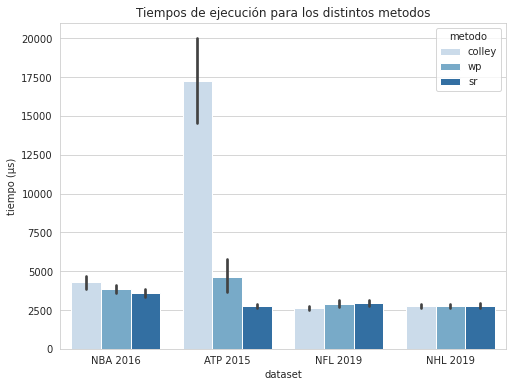

In [36]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.barplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', edgecolor = 'w', estimator=np.mean)

gr.set_title("Tiempos de ejecución para los distintos metodos")
gr.set_ylabel("tiempo (μs)")

fig = gr.get_figure()
name = "exp4_tiempos"
fig.savefig(f"graficos/{name}.png")


Text(0, 0.5, 'tiempo (μs)')

<Figure size 432x288 with 0 Axes>

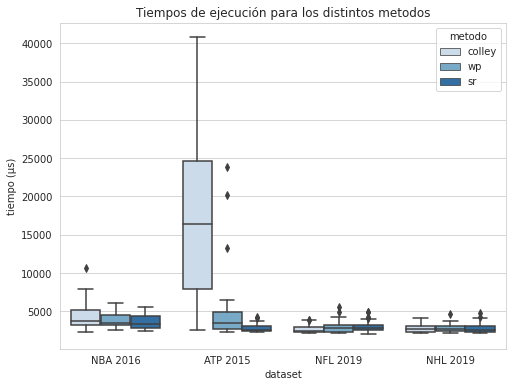

In [37]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.boxplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues',)

gr.set_title("Tiempos de ejecución para los distintos metodos")
gr.set_ylabel("tiempo (μs)")

#fig = gr.get_figure()
#name = "exp4_tiempos"
#fig.savefig(f"graficos/{name}.png")

<Figure size 432x288 with 0 Axes>

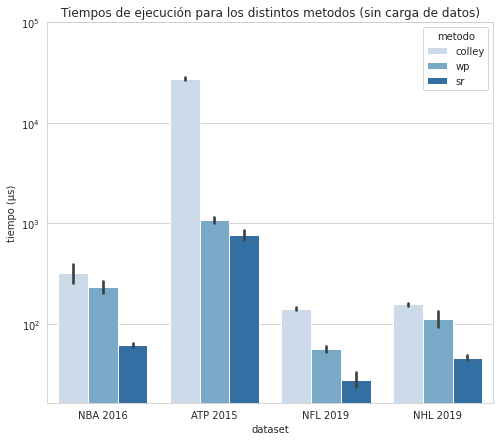

In [38]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4_time_mod.csv')

plt.figure()
plt.figure(figsize=(8,7))
gr = sns.barplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', edgecolor = 'w', estimator=np.mean)

gr.set_title("Tiempos de ejecución para los distintos metodos (sin carga de datos)")
gr.set_ylabel("tiempo (μs)")

#Escala logaritmica
gr.set_yscale("log")

plt.ylim(top=10**5, bottom=0)

fig = gr.get_figure()
name = "exp4_tiempos_time_mod"
fig.savefig(f"graficos/{name}.png")

(12.944985926018521, 100000)

<Figure size 432x288 with 0 Axes>

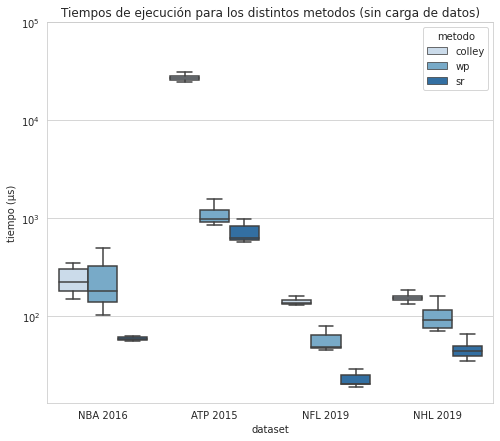

In [39]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4_time_mod.csv')
#df_tiempos = df_tiempos[ df_tiempos['dataset']!='ATP 2015']

plt.figure()
plt.figure(figsize=(8,7))
gr = sns.boxplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', showfliers= False)

gr.set_title("Tiempos de ejecución para los distintos metodos (sin carga de datos)")
gr.set_ylabel("tiempo (μs)")

#Escala logaritmica
gr.set_yscale("log")

plt.ylim(top=10**5, bottom=0)

#fig = gr.get_figure()
#name = "exp4_tiempos_time_mod"
#fig.savefig(f"graficos/{name}.png")